In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
class SVR(nn.Module):
    def __init__(self):
        super(SVR,self).__init__()
        self.linearModel=nn.Linear(1,1)
        
    def forward(self,x):
        x = self.linearModel(x)
        return x

In [4]:
model=SVR()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [5]:
def hingeLoss(outputVal,dataOutput,model):
    loss1=torch.sum(torch.clamp(1 - torch.matmul(outputVal.t(),dataOutput),min=0))
    loss2=torch.sum(model.linearModel.weight ** 2)  # l2 penalty
    totalLoss=loss1+loss2
    return(totalLoss)
criterion = nn.MSELoss()

In [6]:
# X=np.random.rand(1000,100).astype(np.float32)
# Y=np.random.randint(2,size=(1000)).reshape(1000,1).astype(np.float32)

In [7]:
X = 2 * np.random.rand(100, 1).astype(np.float32)
Y = 4 + 3 * X + np.random.randn(100, 1).astype(np.float32)

In [8]:
X.shape

(100, 1)

In [9]:
Y.shape

(100, 1)

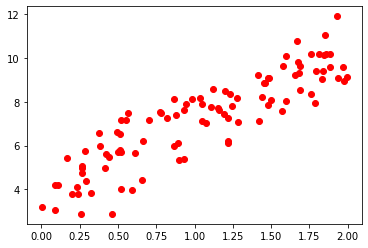

In [10]:
plt.scatter(X, Y, color='red')
plt.show()

In [11]:
for epoch in range(5000):
    inputVal=Variable(torch.from_numpy(X))
    outputVal=Variable(torch.from_numpy(Y))
    optimizer.zero_grad()
    modelOutput = model(inputVal)
#     loss=hingeLoss(outputVal,modelOutput,model)
    loss = criterion(modelOutput, outputVal)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, 5000, loss))

epoch [1/5000], loss:34.3880
epoch [101/5000], loss:14.3046
epoch [201/5000], loss:6.3032
epoch [301/5000], loss:3.1134
epoch [401/5000], loss:1.8397
epoch [501/5000], loss:1.3294
epoch [601/5000], loss:1.1232
epoch [701/5000], loss:1.0383
epoch [801/5000], loss:1.0019
epoch [901/5000], loss:0.9848
epoch [1001/5000], loss:0.9757
epoch [1101/5000], loss:0.9699
epoch [1201/5000], loss:0.9655
epoch [1301/5000], loss:0.9617
epoch [1401/5000], loss:0.9584
epoch [1501/5000], loss:0.9553
epoch [1601/5000], loss:0.9524
epoch [1701/5000], loss:0.9497
epoch [1801/5000], loss:0.9472
epoch [1901/5000], loss:0.9448
epoch [2001/5000], loss:0.9425
epoch [2101/5000], loss:0.9404
epoch [2201/5000], loss:0.9384
epoch [2301/5000], loss:0.9365
epoch [2401/5000], loss:0.9347
epoch [2501/5000], loss:0.9330
epoch [2601/5000], loss:0.9314
epoch [2701/5000], loss:0.9299
epoch [2801/5000], loss:0.9285
epoch [2901/5000], loss:0.9272
epoch [3001/5000], loss:0.9259
epoch [3101/5000], loss:0.9247
epoch [3201/5000],

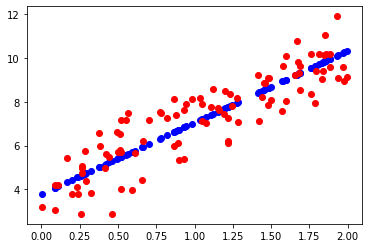

In [12]:
Y_predicted = model(Variable(torch.from_numpy(X))).detach().numpy()
plt.scatter(X, Y_predicted, color='blue')
plt.scatter(X, Y, color='red')